<a href="https://colab.research.google.com/github/mumido/Grupo12_Proyecto_FraudBuster/blob/SVM-model/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/dataset


### Librerías

In [ ]:
#Instalo la librería de scikit-plot
!pip install scikit-plot
#Instalo la librería de dataprep.eda
!pip install -U dataprep

In [45]:
# --------- General Data Science Libraries ------
import pandas as pd
import numpy as np
from scipy.stats import mstats
# --------- Visualization Libraries ---------
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#---------- Other Libraries -------
#from dataprep.eda import create_report, plot, plot_correlation, plot_missing , plot_diff
#---------- Machine Learning Libreries--------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif as mu_clsf
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import scikitplot as skplt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

## 1) Información del dataset


In [4]:
df_fraude = pd.read_csv('fraud_detection_dataset.csv')
df_fraude.head(10)

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00        0               0  
1  M2044282225             0.0            0.00        0               0  
2   C553264065             0.0            0.00        1               0  
3    C38997010         21182.0            0.00        1               0  
4  M1230701703             0.0            0.00        0               0  
5   M573487274             0.0            0.00        0               0  
6   M408069119             0.0            0.00        0               0  
7   M633326333             0.0            0.00        0               0  
8  M1176932104             0.0            0.00        0               0  
9   C195600860         41898.0        40348.79        0               0

In [ ]:
df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df_fraude.tail()

step      type      amount     nameOrig  oldbalanceOrg  \
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362615             0.0   C776919290            0.00       339682.13        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0

## **2) Análisis Multivariado:** Grafico de mapa de calor de correlación del dataset

Índices de correlación más altos:
oldbalanceOrg - newbalanceOrig: 0.9988027631723787
amount - newbalanceDest: 0.45930426729324914
oldbalanceDest - newbalanceDest: 0.9765685054474923


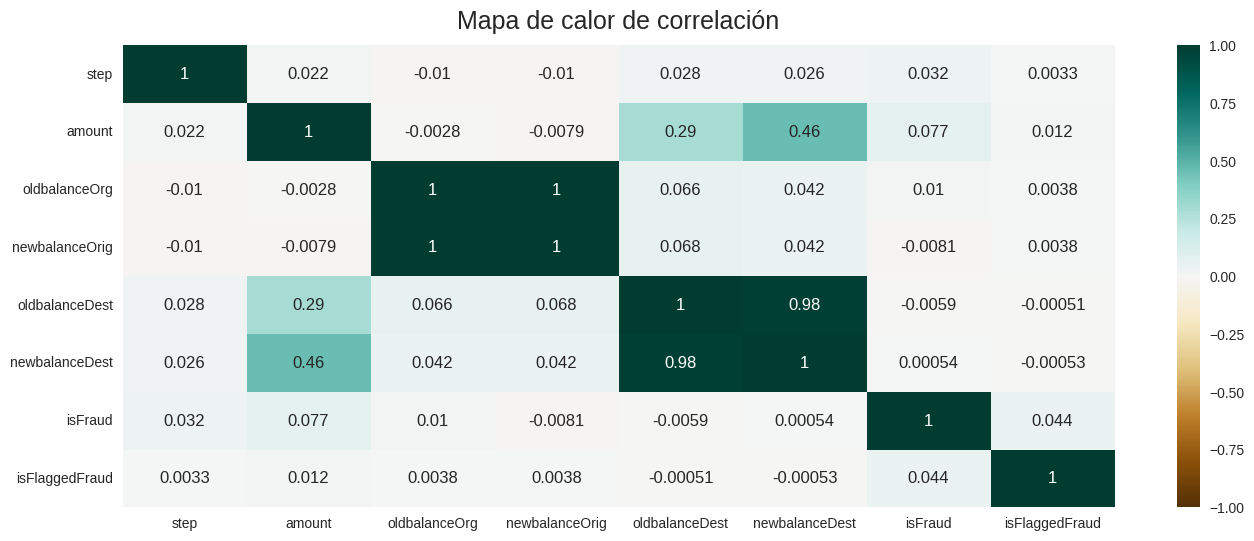

In [ ]:
#Grafico de mapa de calor de correlación del dataset
numeric_df = df_fraude.select_dtypes(include=[np.number])

# Crear el mapa de calor de correlación
plt.figure(figsize=(16, 6))
corr_matrix = numeric_df.corr()
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de calor de correlación', fontdict={'fontsize': 18}, pad=12)

# Obtener los índices de correlación más altos
threshold = 0.3  # Define el umbral de correlación deseado
high_corr_indices = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_indices.add((corr_matrix.columns[j], colname))

# Mostrar los índices de correlación más altos
if high_corr_indices:
    print("Índices de correlación más altos:")
    for pair in high_corr_indices:
        print(f"{pair[0]} - {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]}")
else:
    print("No se encontraron índices de correlación por encima del umbral.")

# Mostrar el gráfico
plt.show()

## 3) Data Cleaning: Análisis de nulos



In [ ]:
#Busqueda de valores nulos
df_fraude.isna().sum().sort_values(ascending = False)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64



*   **Conclusión:** De acuerdo a los resultados, no se observan datos nulos en ninguna de las columnas



## **4) Exploratory Data Analysis (EDA) Interactive**

Computing finalize-f57fa9f7-e812-4f38-afec-e8e32f764dfa:  21%|██        | 1399/6707 [07:04<1:27:12,  1.01it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



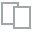
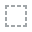
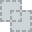
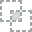
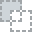
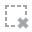
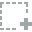
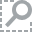
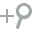
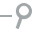
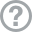
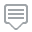
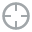
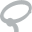
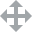
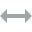
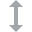
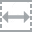
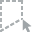
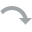
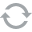
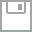
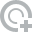
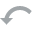
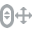
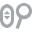
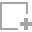
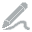
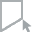
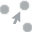
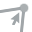
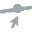

In [ ]:
# Create Dataprep EDA report
report = create_report(df_fraude)

# Show the report
report.show()

## 5) Reduccion de tamaño de dataset

Como el dataset es un archivo muy pesado y al usar todos los datos es computacionalmente intensivo y por ende va a requerir más tiempo de procesamiento y entrenamiento para modelos o algoritmos de clasificacion. Entonces, vamos a usar el 10% de los datos del dataset.

In [5]:
#Guardo el archivo .csv en la variable df_hotel_sample solo utilizando el 10%
df_fraude_sample = df_fraude.sample(frac=0.1, random_state=42)

## 6) Exploratory Data Analysis (EDA): **Variables Categóricas**



In [ ]:
#Realizo el análisis de EDA para variables categóricos
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

In [ ]:
graficos_eda_categoricos(df_fraude_sample.select_dtypes('O'))

## 7) Exploratory Data Analysis (EDA): **Variables Numéricas**



In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
#Tabla de estadistica
estadisticos_cont(df_fraude_sample.select_dtypes('number'))

count          mean      median           std  min  \
step            636262.0  2.435273e+02     239.000  1.424932e+02  1.0   
amount          636262.0  1.810421e+05   74949.345  6.136867e+05  0.0   
oldbalanceOrg   636262.0  8.285452e+05   14111.815  2.877271e+06  0.0   
newbalanceOrig  636262.0  8.499065e+05       0.000  2.913449e+06  0.0   
oldbalanceDest  636262.0  1.106790e+06  133047.955  3.396119e+06  0.0   
newbalanceDest  636262.0  1.232760e+06  215936.310  3.685490e+06  0.0   
isFraud         636262.0  1.284062e-03       0.000  3.581083e-02  0.0   
isFlaggedFraud  636262.0  1.571680e-06       0.000  1.253666e-03  0.0   

                     25%         50%           75%           max  
step              156.00     239.000  3.350000e+02  7.420000e+02  
amount          13362.92   74949.345  2.094772e+05  6.933732e+07  
oldbalanceOrg       0.00   14111.815  1.069565e+05  3.791982e+07  
newbalanceOrig      0.00       0.000  1.436672e+05  3.795009e+07  
oldbalanceDest      0.00  133047.955  9.505290e+05  3.279981e+08  
newbalanceDest      0.00  215936.310  1.119455e+06  3.284317e+08  
isFraud             0.00       0.000  0.000000e+00  1.000000e+00  
isFlaggedFraud      0.00       0.000  0.000000e+00  1.000000e+00

**Conclusión:**

**1. step**

**Interpretación:** El valor medio de "step" es 243.5273, con una mediana de 239.0. La distribución parece relativamente simétrica alrededor de la mediana, con un rango de valores desde 1 hasta 742. Esto sugiere que "step" podría representar el tiempo o una secuencia de pasos en un proceso.

**2. amount**

**Interpretación:** La media es significativamente mayor que la mediana, indicando una distribución sesgada hacia la derecha. Hay una alta variabilidad en los datos de "amount" y valores atípicos muy elevados.

**3. oldbalanceOrg**

**Interpretación:** La mayoría de los saldos originales son bajos (mediana de 14,111.815), aunque hay valores extremadamente altos que elevan la media considerablemente. El primer cuartil es 0, indicando que una gran proporción de observaciones tienen un saldo original de 0.

**4. newbalanceOrig**

**Interpretación:** La mayoría de los nuevos saldos son 0 (mediana y primer cuartil son 0), pero hay valores atípicos muy elevados. Esto sugiere que, en muchas transacciones, el saldo después de la operación es 0.

**5. oldbalanceDest**

**Interpretación:** Los saldos originales de destino varían ampliamente, con una mediana mucho menor que la media, indicando nuevamente una distribución sesgada hacia la derecha con valores atípicos muy altos.

**6. newbalanceDest**

**Interpretación:** Los saldos nuevos de destino muestran una distribución similar a los saldos originales de destino, con una mediana significativamente menor que la media y valores atípicos muy altos.

**7. isFraud**

**Interpretación:** La variable "isFraud" tiene una media muy baja (0.001284062), indicando que solo una pequeña fracción de las transacciones son fraudulentas. La mediana y los cuartiles son 0, lo que confirma que la mayoría de las observaciones no son fraudulentas.

**8. isFlaggedFraud**

**Interpretación:** Similar a "isFraud", la variable "isFlaggedFraud" muestra una media extremadamente baja, indicando que es muy raro que una transacción sea marcada como fraudulenta. La mayoría de las observaciones no están marcadas como fraudulentas.

**Conclusión General:**

El análisis de estas estadísticas descriptivas revela que la mayoría de las transacciones tienen saldos bajos antes y después de la operación, aunque existen algunos valores extremadamente altos que afectan las medias. La distribución de las transacciones fraudulentas es muy baja, lo que sugiere que los datos están dominados por transacciones legítimas.


##8) Preprocesamiento de Datos
Incluye el manejo de valores extremos (outliers y distribución de sesgos), la codificación de variables categóricas y la normalización de variables numéricas.

Para preparar los datos para algoritmos de clasificación, especialmente con datos sesgados y valores atípicos, aplicaremos las técnicas como winsorizing y la transformación logarítmica

### A) **Técnica de Winsorizing**

Winsorizing es una técnica para limitar los valores extremos en los datos para reducir el efecto de los valores atípicos. En lugar de eliminar los valores atípicos, los límites superior e inferior se fijan a ciertos percentiles de la distribución de los datos.

*Cuándo usar Winsorizing:*

Cuando los valores atípicos afectan significativamente la media y la varianza de tus datos.
Cuando deseas conservar todas las observaciones, pero necesitas mitigar el impacto de los valores extremos.

In [6]:
# Aplico la técnica de Winsorizing a columnas
df_fraude_sample['amount_winsorized'] = mstats.winsorize(df_fraude_sample['amount'], limits=[0.01, 0.01])
df_fraude_sample['oldbalanceOrg_winsorized'] = mstats.winsorize(df_fraude_sample['oldbalanceOrg'], limits=[0.01, 0.01])
df_fraude_sample['newbalanceOrig_winsorized'] = mstats.winsorize(df_fraude_sample['newbalanceOrig'], limits=[0.01, 0.01])
df_fraude_sample['oldbalanceDest_winsorized'] = mstats.winsorize(df_fraude_sample['oldbalanceDest'], limits=[0.01, 0.01])
df_fraude_sample['newbalanceDest_winsorized'] = mstats.winsorize(df_fraude_sample['newbalanceDest'], limits=[0.01, 0.01])

In [7]:
df_fraude_sample

step      type      amount     nameOrig  oldbalanceOrg  \
3737323   278   CASH_IN   330218.42   C632336343       20866.00   
264914     15   PAYMENT    11647.08  C1264712553       30370.00   
85647      10   CASH_IN   152264.21  C1746846248      106589.00   
5899326   403  TRANSFER  1551760.63   C333676753           0.00   
2544263   206   CASH_IN    78172.30   C813403091     2921331.58   
...       ...       ...         ...          ...            ...   
1172200   132  CASH_OUT   415721.93  C1050495198           0.00   
4791099   345  CASH_OUT     1268.70  C1093037836           0.00   
3150498   236   PAYMENT    11321.01  C1477386440           0.00   
2361946   190   PAYMENT     2791.68   C398656338       58727.00   
759063     38   CASH_IN   460420.24    C88799172      325415.49   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3737323       351084.42   C834976624       452419.57       122201.15        0   
264914         18722.92   M215391829            0.00            0.00        0   
85647         258853.21  C1607284477       201303.01        49038.80        0   
5899326            0.00  C1564353608      3198359.45      4750120.08        0   
2544263      2999503.88  C1091768874       415821.90       337649.60        0   
...                 ...          ...             ...             ...      ...   
1172200            0.00   C547650791       932883.24      1348605.16        0   
4791099            0.00   C628982495      4417140.07      4418408.76        0   
3150498            0.00   M805812799            0.00            0.00        0   
2361946        55935.32  M1075339200            0.00            0.00        0   
759063        785835.73  C1120976797       968376.76       507956.51        0   

         isFlaggedFraud  amount_winsorized  oldbalanceOrg_winsorized  \
3737323               0          330218.42                  20866.00   
264914                0           11647.08                  30370.00   
85647                 0          152264.21                 106589.00   
5899326               0         1551760.63                      0.00   
2544263               0           78172.30                2921331.58   
...                 ...                ...                       ...   
1172200               0          415721.93                      0.00   
4791099               0            1268.70                      0.00   
3150498               0           11321.01                      0.00   
2361946               0            2791.68                  58727.00   
759063                0          460420.24                 325415.49   

         newbalanceOrig_winsorized  oldbalanceDest_winsorized  \
3737323                  351084.42                  452419.57   
264914                    18722.92                       0.00   
85647                    258853.21                  201303.01   
5899326                       0.00                 3198359.45   
2544263                 2999503.88                  415821.90   
...                            ...                        ...   
1172200                       0.00                  932883.24   
4791099                       0.00                 4417140.07   
3150498                       0.00                       0.00   
2361946                   55935.32                       0.00   
759063                   785835.73                  968376.76   

         newbalanceDest_winsorized  
3737323                  122201.15  
264914                        0.00  
85647                     49038.80  
5899326                 4750120.08  
2544263                  337649.60  
...                            ...  
1172200                 1348605.16  
4791099                 4418408.76  
3150498                       0.00  
2361946                       0.00  
759063                   507956.51  

[636262 rows x 16 columns]

### B) **Transformación Logarítmica**

Transformación logarítmica es útil para reducir la skewness (asimetría) de la distribución de los datos. Es particularmente efectiva cuando los datos abarcan varios órdenes de magnitud.

*Cuándo usar Transformación Logarítmica:*

Cuando los datos tienen una distribución sesgada hacia la derecha.
Cuando los valores de la variable cubren un rango amplio.

In [8]:
# Aplico la transformacion logaritmica
df_fraude_sample['amount_log'] = np.log1p(df_fraude_sample['amount_winsorized'])
df_fraude_sample['oldbalanceOrg_log'] = np.log1p(df_fraude_sample['oldbalanceOrg_winsorized'])
df_fraude_sample['newbalanceOrig_log'] = np.log1p(df_fraude_sample['newbalanceOrig_winsorized'])
df_fraude_sample['oldbalanceDest_log'] = np.log1p(df_fraude_sample['oldbalanceDest_winsorized'])
df_fraude_sample['newbalanceDest_log'] = np.log1p(df_fraude_sample['newbalanceDest_winsorized'])

In [9]:
df_fraude_sample

step      type      amount     nameOrig  oldbalanceOrg  \
3737323   278   CASH_IN   330218.42   C632336343       20866.00   
264914     15   PAYMENT    11647.08  C1264712553       30370.00   
85647      10   CASH_IN   152264.21  C1746846248      106589.00   
5899326   403  TRANSFER  1551760.63   C333676753           0.00   
2544263   206   CASH_IN    78172.30   C813403091     2921331.58   
...       ...       ...         ...          ...            ...   
1172200   132  CASH_OUT   415721.93  C1050495198           0.00   
4791099   345  CASH_OUT     1268.70  C1093037836           0.00   
3150498   236   PAYMENT    11321.01  C1477386440           0.00   
2361946   190   PAYMENT     2791.68   C398656338       58727.00   
759063     38   CASH_IN   460420.24    C88799172      325415.49   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3737323       351084.42   C834976624       452419.57       122201.15        0   
264914         18722.92   M215391829            0.00            0.00        0   
85647         258853.21  C1607284477       201303.01        49038.80        0   
5899326            0.00  C1564353608      3198359.45      4750120.08        0   
2544263      2999503.88  C1091768874       415821.90       337649.60        0   
...                 ...          ...             ...             ...      ...   
1172200            0.00   C547650791       932883.24      1348605.16        0   
4791099            0.00   C628982495      4417140.07      4418408.76        0   
3150498            0.00   M805812799            0.00            0.00        0   
2361946        55935.32  M1075339200            0.00            0.00        0   
759063        785835.73  C1120976797       968376.76       507956.51        0   

         ...  amount_winsorized  oldbalanceOrg_winsorized  \
3737323  ...          330218.42                  20866.00   
264914   ...           11647.08                  30370.00   
85647    ...          152264.21                 106589.00   
5899326  ...         1551760.63                      0.00   
2544263  ...           78172.30                2921331.58   
...      ...                ...                       ...   
1172200  ...          415721.93                      0.00   
4791099  ...            1268.70                      0.00   
3150498  ...           11321.01                      0.00   
2361946  ...            2791.68                  58727.00   
759063   ...          460420.24                 325415.49   

         newbalanceOrig_winsorized  oldbalanceDest_winsorized  \
3737323                  351084.42                  452419.57   
264914                    18722.92                       0.00   
85647                    258853.21                  201303.01   
5899326                       0.00                 3198359.45   
2544263                 2999503.88                  415821.90   
...                            ...                        ...   
1172200                       0.00                  932883.24   
4791099                       0.00                 4417140.07   
3150498                       0.00                       0.00   
2361946                   55935.32                       0.00   
759063                   785835.73                  968376.76   

         newbalanceDest_winsorized  amount_log  oldbalanceOrg_log  \
3737323                  122201.15   12.707513           9.945924   
264914                        0.00    9.362897          10.321243   
85647                     49038.80   11.933379          11.576745   
5899326                 4750120.08   14.254901           0.000000   
2544263                  337649.60   11.266683          14.887550   
...                            ...         ...                ...   
1172200                 1348605.16   12.937774           0.000000   
4791099                 4418408.76    7.146536           0.000000   
3150498                       0.00    9.334504           0.000000   
2361946                    

In [10]:
df_fraude_sample.drop(columns=['amount',
                               'oldbalanceOrg',
                               'newbalanceOrig',
                               'oldbalanceDest',
                               'newbalanceDest'], inplace=True)

df_fraude_sample

step      type     nameOrig     nameDest  isFraud  isFlaggedFraud  \
3737323   278   CASH_IN   C632336343   C834976624        0               0   
264914     15   PAYMENT  C1264712553   M215391829        0               0   
85647      10   CASH_IN  C1746846248  C1607284477        0               0   
5899326   403  TRANSFER   C333676753  C1564353608        0               0   
2544263   206   CASH_IN   C813403091  C1091768874        0               0   
...       ...       ...          ...          ...      ...             ...   
1172200   132  CASH_OUT  C1050495198   C547650791        0               0   
4791099   345  CASH_OUT  C1093037836   C628982495        0               0   
3150498   236   PAYMENT  C1477386440   M805812799        0               0   
2361946   190   PAYMENT   C398656338  M1075339200        0               0   
759063     38   CASH_IN    C88799172  C1120976797        0               0   

         amount_winsorized  oldbalanceOrg_winsorized  \
3737323          330218.42                  20866.00   
264914            11647.08                  30370.00   
85647            152264.21                 106589.00   
5899326         1551760.63                      0.00   
2544263           78172.30                2921331.58   
...                    ...                       ...   
1172200          415721.93                      0.00   
4791099            1268.70                      0.00   
3150498           11321.01                      0.00   
2361946            2791.68                  58727.00   
759063           460420.24                 325415.49   

         newbalanceOrig_winsorized  oldbalanceDest_winsorized  \
3737323                  351084.42                  452419.57   
264914                    18722.92                       0.00   
85647                    258853.21                  201303.01   
5899326                       0.00                 3198359.45   
2544263                 2999503.88                  415821.90   
...                            ...                        ...   
1172200                       0.00                  932883.24   
4791099                       0.00                 4417140.07   
3150498                       0.00                       0.00   
2361946                   55935.32                       0.00   
759063                   785835.73                  968376.76   

         newbalanceDest_winsorized  amount_log  oldbalanceOrg_log  \
3737323                  122201.15   12.707513           9.945924   
264914                        0.00    9.362897          10.321243   
85647                     49038.80   11.933379          11.576745   
5899326                 4750120.08   14.254901           0.000000   
2544263                  337649.60   11.266683          14.887550   
...                            ...         ...                ...   
1172200                 1348605.16   12.937774           0.000000   
4791099                 4418408.76    7.146536           0.000000   
3150498                       0.00    9.334504           0.000000   
2361946                       0.00    7.934757          10.980672   
759063                   507956.51   13.039897          12.692861   

         newbalanceOrig_log  oldbalanceDest_log  newbalanceDest_log  
3737323           12.768785           13.022367           11.713432  
264914             9.837557            0.000000            0.000000  
85647             12.464020           12.212572           10.800387  
5899326            0.000000           14.978149           15.373681  
2544263           14.913958           12.938015           12.729767  
...                     ...                 ...                 ...  
1172200            0.000000           13.746036           14.114582  
4791099            0.000000           15.301003           15.301290  
3150498            0.000000            0.000000            0.000000  
2361946           10.931969            0.000000            0.000000  
759063            1

In [11]:
df_fraude_sample.drop(columns=[
    'amount_winsorized',
    'oldbalanceOrg_winsorized',
    'newbalanceOrig_winsorized',
    'oldbalanceDest_winsorized',
    'newbalanceDest_winsorized'
], inplace=True)

df_fraude_sample

step      type     nameOrig     nameDest  isFraud  isFlaggedFraud  \
3737323   278   CASH_IN   C632336343   C834976624        0               0   
264914     15   PAYMENT  C1264712553   M215391829        0               0   
85647      10   CASH_IN  C1746846248  C1607284477        0               0   
5899326   403  TRANSFER   C333676753  C1564353608        0               0   
2544263   206   CASH_IN   C813403091  C1091768874        0               0   
...       ...       ...          ...          ...      ...             ...   
1172200   132  CASH_OUT  C1050495198   C547650791        0               0   
4791099   345  CASH_OUT  C1093037836   C628982495        0               0   
3150498   236   PAYMENT  C1477386440   M805812799        0               0   
2361946   190   PAYMENT   C398656338  M1075339200        0               0   
759063     38   CASH_IN    C88799172  C1120976797        0               0   

         amount_log  oldbalanceOrg_log  newbalanceOrig_log  \
3737323   12.707513           9.945924           12.768785   
264914     9.362897          10.321243            9.837557   
85647     11.933379          11.576745           12.464020   
5899326   14.254901           0.000000            0.000000   
2544263   11.266683          14.887550           14.913958   
...             ...                ...                 ...   
1172200   12.937774           0.000000            0.000000   
4791099    7.146536           0.000000            0.000000   
3150498    9.334504           0.000000            0.000000   
2361946    7.934757          10.980672           10.931969   
759063    13.039897          12.692861           13.574504   

         oldbalanceDest_log  newbalanceDest_log  
3737323           13.022367           11.713432  
264914             0.000000            0.000000  
85647             12.212572           10.800387  
5899326           14.978149           15.373681  
2544263           12.938015           12.729767  
...                     ...                 ...  
1172200           13.746036           14.114582  
4791099           15.301003           15.301290  
3150498            0.000000            0.000000  
2361946            0.000000            0.000000  
759063            13.783378           13.138153  

[636262 rows x 11 columns]

### C) **Escalado o normalización de variables**

In [12]:
# Codificación de variables categóricas
label_encoders = {}
for column in df_fraude_sample.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_fraude_sample[column] = le.fit_transform(df_fraude_sample[column])
    label_encoders[column] = le

# Normalización de variables numéricas
# scaler = StandardScaler()
# num_columns = df_fraude_sample.select_dtypes(include=['float64', 'int64']).columns
# df_fraude_sample[num_columns] = scaler.fit_transform(df_fraude_sample[num_columns])

In [13]:
print(df_fraude_sample.head())

         step  type  nameOrig  nameDest  isFraud  isFlaggedFraud  amount_log  \
3737323   278     0    515158    221549        0               0   12.707513   
264914     15     3     87134    370005        0               0    9.362897   
85647      10     0    246139     76027        0               0   11.933379   
5899326   403     4    416801     70612        0               0   14.254901   
2544263   206     0    574944     11530        0               0   11.266683   

         oldbalanceOrg_log  newbalanceOrig_log  oldbalanceDest_log  \
3737323           9.945924           12.768785           13.022367   
264914           10.321243            9.837557            0.000000   
85647            11.576745           12.464020           12.212572   
5899326           0.000000            0.000000           14.978149   
2544263          14.887550           14.913958           12.938015   

         newbalanceDest_log  
3737323           11.713432  
264914             0.000000  
85647   

In [14]:
# Normalización de variables numéricas
# Identificar columnas numéricas excluyendo 'isFraud'
num_columns = df_fraude_sample.select_dtypes(include=['float64', 'int64']).columns
num_columns = num_columns.difference(['isFraud'])

# Crear una copia del DataFrame para evitar modificaciones directas
df_fraude_sample_scaled = df_fraude_sample.copy()

# Aplicar el escalado solo a las columnas numéricas seleccionadas
scaler = StandardScaler()
df_fraude_sample_scaled[num_columns] = scaler.fit_transform(df_fraude_sample[num_columns])

# Verificar el resultado
print(df_fraude_sample_scaled.head())

             step      type  nameOrig  nameDest  isFraud  isFlaggedFraud  \
3737323  0.241925 -1.270613  1.073091  0.181206        0       -0.001254   
264914  -1.603779  0.951041 -1.257592  1.346272        0       -0.001254   
85647   -1.638868 -1.270613 -0.391776 -0.960834        0       -0.001254   
5899326  1.119161  1.691593  0.537516 -1.003331        0       -0.001254   
2544263 -0.263363 -1.270613  1.398638 -1.467000        0       -0.001254   

         amount_log  oldbalanceOrg_log  newbalanceOrig_log  \
3737323    1.050930           0.447986            1.172419   
264914    -0.836527           0.514291            0.708728   
85647      0.614065           0.736089            1.124208   
5899326    1.924163          -1.309069           -0.847473   
2544263    0.237831           1.320978            1.511763   

         oldbalanceDest_log  newbalanceDest_log  
3737323            0.786077            0.507380  
264914            -1.144826           -1.248093  
85647              0

In [15]:
df_fraude_sample = df_fraude_sample_scaled
df_fraude_sample

step      type  nameOrig  nameDest  isFraud  isFlaggedFraud  \
3737323  0.241925 -1.270613  1.073091  0.181206        0       -0.001254   
264914  -1.603779  0.951041 -1.257592  1.346272        0       -0.001254   
85647   -1.638868 -1.270613 -0.391776 -0.960834        0       -0.001254   
5899326  1.119161  1.691593  0.537516 -1.003331        0       -0.001254   
2544263 -0.263363 -1.270613  1.398638 -1.467000        0       -0.001254   
...           ...       ...       ...       ...      ...             ...   
1172200 -0.782686 -0.530062 -1.641855 -0.102126        0       -0.001254   
4791099  0.712123 -0.530062 -1.566080 -0.023412        0       -0.001254   
3150498 -0.052826  0.951041 -0.873568  1.860756        0       -0.001254   
2361946 -0.375649  0.951041  0.654294  0.407994        0       -0.001254   
759063  -1.442367 -1.270613  1.531044 -1.438794        0       -0.001254   

         amount_log  oldbalanceOrg_log  newbalanceOrig_log  \
3737323    1.050930           0.447986            1.172419   
264914    -0.836527           0.514291            0.708728   
85647      0.614065           0.736089            1.124208   
5899326    1.924163          -1.309069           -0.847473   
2544263    0.237831           1.320978            1.511763   
...             ...                ...                 ...   
1172200    1.180873          -1.309069           -0.847473   
4791099   -2.087279          -1.309069           -0.847473   
3150498   -0.852550          -1.309069           -0.847473   
2361946   -1.642465           0.630786            0.881853   
759063     1.238503           0.933263            1.299875   

         oldbalanceDest_log  newbalanceDest_log  
3737323            0.786077            0.507380  
264914            -1.144826           -1.248093  
85647              0.666004            0.370544  
5899326            1.076072            1.055936  
2544263            0.773570            0.659697  
...                     ...                 ...  
1172200            0.893380            0.867237  
4791099            1.123944            1.045087  
3150498           -1.144826           -1.248093  
2361946           -1.144826           -1.248093  
759063             0.898916            0.720901  

[636262 rows x 11 columns]

### D) Separación en variables carasterísticas (features variable) y variable objetivo (target variable)

In [16]:
features = ['amount_log', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log', 'step', 'nameOrig', 'nameDest', 'isFlaggedFraud', 'type']
X = df_fraude_sample[features]
y = df_fraude_sample['isFraud']

### E) Division de datos en conjuntos de entrenamiento y prueba

In [17]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### F) Equilibrar Clases: SMOTE (Synthetic Minority Over-sampling Technique)

Aplicar SMOTE al conjunto de entrenamiento

In [18]:
# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después de aplicar SMOTE
print(pd.Series(y_train_res).value_counts())

0    508355
1    508355
Name: isFraud, dtype: int64


## 9) Machine Learning

### 1- Algoritmo de clasificacion: Support Vectorial Machines (SVM)

#### A) Entrenamiento y Predicción con un Modelo variante de Support Vectorial Machines:

***Vamos a implementar una variante del SVM conocida como Linear SVM (Support Vector Machine), entrenada mediante descenso de gradiente estocástico (SGD)***

Comparación



*   **SVM Clásico:** Utiliza optimización cuadrática, adecuado para conjuntos de datos pequeños a medianos, pero se vuelve ineficiente para grandes volúmenes de datos.

*   **SGDClassifier con 'hinge':** Utiliza descenso de gradiente estocástico, adecuado para conjuntos de datos grandes, proporciona una aproximación del SVM lineal con mucho menos costo computacional.

In [38]:
# Crear y entrenar el modelo SGDClassifier
sgd_model = SGDClassifier(loss='hinge', random_state=42)
sgd_model.fit(X_train_res, y_train_res)

# Predicciones
previsoes = sgd_model.predict(X_test)

In [ ]:
#Entrenamiento y Predicción con un Modelo de Support Vectorial Machines
# svm_model = SVC(probability=True, random_state=42)
# svm_model.fit(X_train_res, y_train_res)
# previsoes = svm_model.predict(X_test)

#### B) Precision de las predicciones realizada por el modelo SVM

In [20]:
#calcular la precisión de las predicciones realizada por el modelo Support Vectorial Machines
classification_SVM = (accuracy_score(y_test, previsoes))
classification_SVM

0.9565275474841457

**Conclusión:** el resultado de la precisión de las predicciones realizada por este modelo es excelente para aplicar y se comprobará mediante la validación del modelo.

#### C) Precision de las predicciones de test data y training data

In [21]:
#Calcular la precisión de las predicciones de test data y training data
#training data
sgd_model_predict_train = sgd_model.predict(X_train_res)
print("Accuracy over Training data: {0:.4f}".format(metrics.accuracy_score(y_train_res, sgd_model_predict_train)))
#testing data
sgd_model_predict_test = sgd_model.predict(X_test)
print("Accuracy over Testing data: {0:.4f}".format(metrics.accuracy_score(y_test, sgd_model_predict_test)))

Accuracy over Training data: 0.9695
Accuracy over Testing data: 0.9565


**Conclusion:** El modelo de **SGDClassifier** ha demostrado un alto nivel de sensibilidad con un recall de 0.956 en el conjunto de prueba. Esto significa que el modelo es efectivo en la identificación de la mayoría de los casos positivos en el problema de clasificación. Este alto recall es especialmente importante en situaciones en las que minimizar los falsos negativos (casos positivos no detectados) es crítico.

#### D) *Validación del modelo:*



*   **Confussion Matrix**



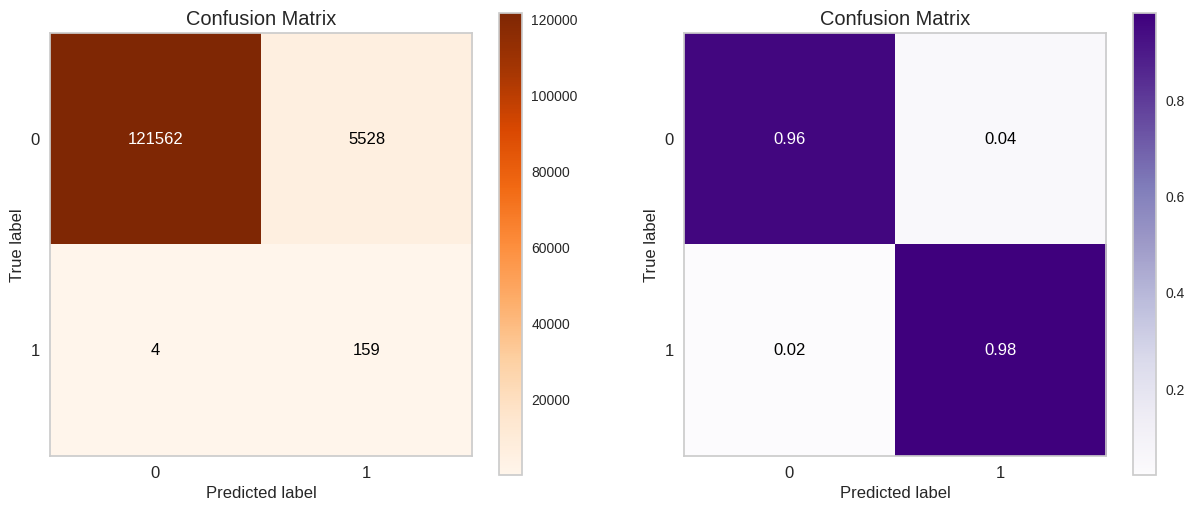

In [22]:
Y_predict = sgd_model.predict(X_test)

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, Y_predict,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, Y_predict,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);

**Conclusión:** Tuvimos un **97% de precisión**, definitivamente es un excelente modelo, aprendió mucho para predecir tanto para transacciones fraudulentas y no fraudulentas.



*   **Score F1**



In [23]:
# Validación de Modelo por test F1
classification_sgd = (classification_report(y_test, previsoes))
print(classification_sgd)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    127090
           1       0.03      0.98      0.05       163

    accuracy                           0.96    127253
   macro avg       0.51      0.97      0.52    127253
weighted avg       1.00      0.96      0.98    127253



**Conclusión:**

**Clase 0:**

**Alta precisión (1.00):**  Casi todos los ejemplos predichos como clase 0 son realmente clase 0.

**Alto recall (0.96):**  El modelo captura la mayoría de los ejemplos de clase 0.

El modelo maneja muy bien la clase 0.

**Clase 1:**

**Baja precisión (0.03):** La mayoría de los ejemplos predichos como clase 1 no son realmente clase 1, es decir, hay muchos falsos positivos.

**Alto recall (0.98):** El modelo captura casi todos los ejemplos de clase 1.

La alta recall y baja precisión indican que el modelo está etiquetando muchos ejemplos como clase 1, incluyendo muchos que no lo son (falsos positivos).

**Score F1:**

El score F1 de 96% es alto principalmente debido a la clase mayoritaria.

La **macro avg del F1-Score** de 0.52 sugiere que el modelo no tiene un rendimiento equilibrado entre las clases.

**Weighted avg del F1-Score** de 0.98 es alta debido a la ponderación por el gran tamaño de la clase mayoritaria.



*   **Recall**



In [24]:
# Calcular el recall utilizando las predicciones y etiquetas reales
recall = recall_score(y_test, previsoes)

print("Recall del modelo Support Vectorial Machines:", recall)

Recall del modelo Support Vectorial Machines: 0.9754601226993865


**Conclusion:** El modelo de  ha demostrado un alto nivel de sensibilidad con un recall de 0.97 en el conjunto de prueba. Esto significa que el modelo es efectivo en la identificación de la mayoría de los casos positivos en el problema de clasificación. Este alto recall es especialmente importante en situaciones en las que minimizar los falsos negativos (casos positivos no detectados) es crítico



*   **Cross-Validation**


In [26]:
# puntuar por precisión significa simplemente puntuar por el porcentaje de predicciones correctas
scores = cross_val_score(sgd_model, X, y, cv=4, scoring='accuracy')
print('Mean accuracy of {:.1f}%'.format(scores.mean()*100))

Mean accuracy of 99.9%


**Conclusión:** Esta accuracy de 99,9% es muy buena, lo que significa que, de acuerdo al modelo elegido, se puede concluir que el modelo tiene un rendimiento sólido y generalmente se ajusta bien a los datos.



*   **Cross-Validation K-folds**


In [28]:
# Definimos el número de pliegues (folds) para la validación cruzada
num_folds = 10

# Inicializamos el objeto KFold para la validación cruzada
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# Variables para almacenar las puntuaciones de validación cruzada
train_scores = []
test_scores = []

# Realizamos la validación cruzada
for train_index, test_index in kf.split(X):
    # Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
    X_train_res, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_res, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenamos el modelo en el conjunto de entrenamiento
    sgd_model.fit(X_train_res, y_train_res)

    # Evaluamos el rendimiento en los conjuntos de entrenamiento y prueba
    train_score = sgd_model.score(X_train_res, y_train_res)
    test_score = sgd_model.score(X_test, y_test)

    # Almacenamos las puntuaciones
    train_scores.append(train_score)
    test_scores.append(test_score)

# Imprimimos las puntuaciones obtenidas en cada pliegue
for fold_idx, (train_score, test_score) in enumerate(zip(train_scores, test_scores)):
    print(f"Fold {fold_idx+1} - Train score: {train_score:.4f}, Test score: {test_score:.4f}")

# Calcular y mostrar el promedio y desviación estándar de las puntuaciones
print(f"\nAverage Train score: {np.mean(train_scores):.4f} ± {np.std(train_scores):.4f}")
print(f"Average Test score: {np.mean(test_scores):.4f} ± {np.std(test_scores):.4f}")

Fold 1 - Train score: 0.9993, Test score: 0.9992
Fold 2 - Train score: 0.9993, Test score: 0.9994
Fold 3 - Train score: 0.9993, Test score: 0.9992
Fold 4 - Train score: 0.9993, Test score: 0.9994
Fold 5 - Train score: 0.9993, Test score: 0.9994
Fold 6 - Train score: 0.9992, Test score: 0.9992
Fold 7 - Train score: 0.9993, Test score: 0.9993
Fold 8 - Train score: 0.9993, Test score: 0.9993
Fold 9 - Train score: 0.9993, Test score: 0.9994
Fold 10 - Train score: 0.9993, Test score: 0.9992

Average Train score: 0.9993 ± 0.0000
Average Test score: 0.9993 ± 0.0001


**Conclusion:** Basado en los resultados de la validación cruzada k-folds, podemos observar que el modelo de SVM-SGDClassifier demostró un buen rendimiento en la mayoría de los pliegues. Con una puntuación de entrenamiento promedio de aproximadamente 0.99 (99%) y una puntuación de prueba promedio de alrededor de 0.99 (99%), el modelo muestra una capacidad sólida para generalizar a nuevos datos.

* **Gráfico:** Cross Validation Score y Training Score




**Este gráfico muestra la curva de aprendizaje de un modelo de clasificación utilizando validación cruzada. Esta curva proporciona información sobre cómo el rendimiento del modelo varía a medida que se incrementa el tamaño del conjunto de entrenamiento.**

In [29]:
# Obtener valores de la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(sgd_model, X_train_res, y_train_res,
                                                        cv=7, shuffle=True, scoring="accuracy",
                                                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

# Imprimir los valores obtenidos
print("Train Sizes:", train_sizes)
print("Train Scores:", train_scores)
print("Test Scores:", test_scores)

Train Sizes: [ 49083 159519 269956 380393 490830]
Train Scores: [[0.9993073  0.99932767 0.99902206 0.99906281 0.99926655 0.99906281
  0.99918505]
 [0.99922893 0.99918505 0.99916624 0.99935431 0.99922893 0.99922893
  0.99929789]
 [0.99918876 0.99924432 0.99930359 0.99929248 0.99927025 0.99924803
  0.99926655]
 [0.99927706 0.99930335 0.99920608 0.99932701 0.99930598 0.99933227
  0.99935593]
 [0.99931748 0.99931545 0.99932767 0.99931748 0.99932359 0.99929507
  0.99927674]]
Test Scores: [[0.99919321 0.999291   0.99897317 0.99926655 0.99909541 0.99907096
  0.99904651]
 [0.99916877 0.99920543 0.99921765 0.99931545 0.99914431 0.9991932
  0.999291  ]
 [0.99905875 0.9992421  0.99932767 0.99930322 0.99933989 0.99916875
  0.99922988]
 [0.99925433 0.99931545 0.99925432 0.99932767 0.99938879 0.99926655
  0.99936434]
 [0.99929101 0.99931545 0.99927877 0.99930322 0.99937657 0.99922988
  0.99922988]]


<Axes: title={'center': 'Classification Learning Curve'}, xlabel='Training examples', ylabel='Score'>

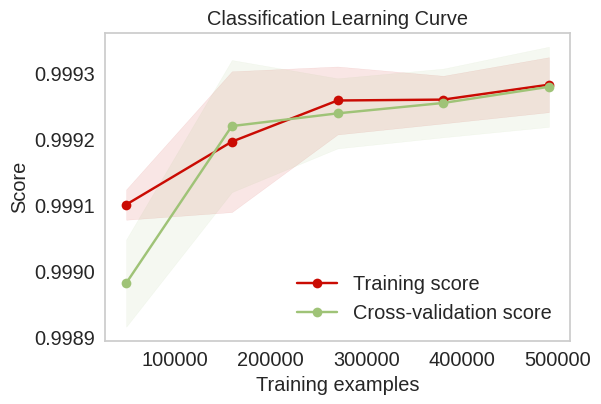

In [30]:
#"Curva de Aprendizaje para un Modelo de Clasificación"
skplt.estimators.plot_learning_curve(sgd_model, X_train_res, y_train_res,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve")

**Conclusión:** Basada en el gráfico es que el modelo muestra un rendimiento creciente a medida que aumenta el tamaño del conjunto de datos, lo que sugiere que el modelo se beneficia de un mayor número de ejemplos de entrenamiento y tiene una mayor capacidad de generalización (a medida que aumenta el tamaño del conjunto de datos se evita el overfitting o sobreajuste de los datos)

* **Curva AUC y ROC**

El SGDClassifier con la función de pérdida 'hinge' (que implementa un SVM lineal) no proporciona estimaciones de probabilidad mediante predict_proba. La función de pérdida 'hinge' solo permite predicciones de clases, no probabilidades.

Para calcular la curva ROC y el AUC con un SGDClassifier, vamos a utilizar la función de pérdida 'log' o 'modified_huber', que permiten el uso de predict_proba.

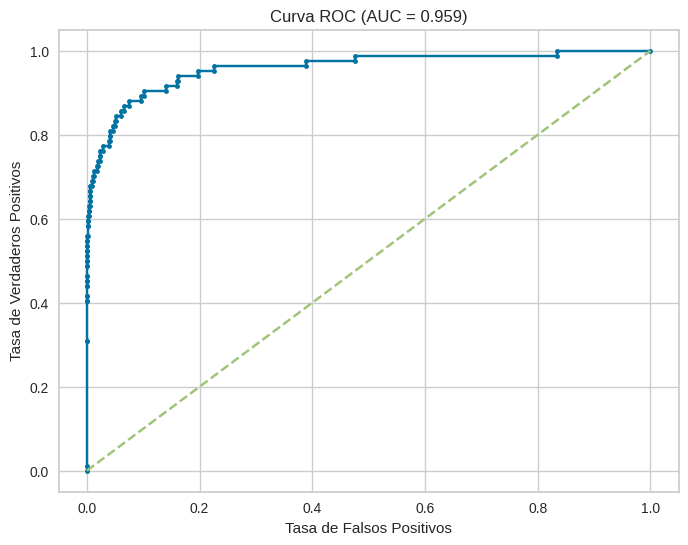

In [37]:
# Inicializar el modelo con la función de pérdida 'log'
sgd_model = SGDClassifier(loss='log', random_state=42)

# Entrenar el modelo
sgd_model.fit(X_train_res, y_train_res)

# Calculamos las probabilidades de predicción para la clase positiva
probs = sgd_model.predict_proba(X_test)[:, 1]

# Calculamos el puntaje AUC
auc = roc_auc_score(y_test, probs)

# Calculamos la curva ROC
fpr, tpr, _ = roc_curve(y_test, probs)

# Plot de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (AUC = {:.3f})'.format(auc))
plt.show()

**Conclusion:** Un valor de AUC de 0.959 es extremadamente bueno y sugiere que el modelo  tiene una capacidad sobresaliente para distinguir entre las clases. Indica que el modelo SVM-SGDClassifier tiene un rendimiento muy sólido en comparación con un modelo aleatorio (AUC = 0.5) o peor. Este alto AUC sugiere que el modelo está haciendo una excelente separación entre las clases

### **3) PCA (Principle components analysis):** Unsupervised Learning Model

La técnica PCA forma parte de los algoritmos de aprendizaje no supervisado de Machine Learning, y se utilizaría solo con aquellas variables numéricas disponibles

Para continuar nuestra búsqueda de un espacio de características más pequeño, apliquemos el análisis de componentes principales (PCA). El PCA requiere una estandarización de las características (la cual ya hemos estandarizado que se encuentra en la sección Machine Learning)

*   *Ahora, apliquemos la transformación PCA para el espacio de características:*

In [58]:
pca = PCA(n_components=X_train_res.shape[1]) # utiliza todas las features
X_trans_11 = pca.fit_transform(X_train_res)

*   **Trazar la varianza explicada:**






La "varianza explicada" cuantifica qué parte de la varianza de los datos explica cada "nuevo" espacio de características. En el siguiente gráfico, muestro esta cantidad en función del número de características PCA:

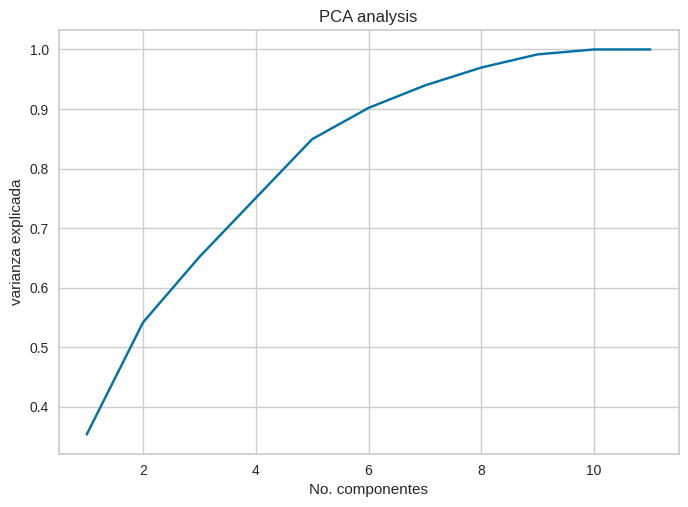

In [60]:
comp_n_axis = np.arange(1, 12)
variance_axis = list()
for i in range(11):
    variance_axis.append(pca.explained_variance_ratio_[0:i+1].sum())

plt.title('PCA analysis')
plt.ylabel('varianza explicada')
plt.xlabel('No. componentes')
plt.plot(comp_n_axis, variance_axis);

La varianza explicada alcanza el 90% con unos 6 componentes, pero sólo el 55% con dos componentes. Sin embargo, procedamos con sólo dos características. Una de las ventajas del PCA es que permite cuantificar la importancia relativa de cada una de las características transformadas en función de sus valores singulares.

*   **Ahora, veremos la métrica de evaluación para PCA:**




In [61]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_train_res)

In [65]:
# Calcular la métrica de precisión utilizando validación cruzada
scores = cross_val_score(sgd_model, X_pca_2, y_train_res, cv=5, scoring='accuracy')

# Imprimir la métrica de precisión promedio
print('Precisión media utilizando PCA: {:.2f}'.format(scores.mean()*100))

Precisión media utilizando PCA: 99.87


**Conclusion:** Con sólo dos características podemos obtener un **99,87%**. PCA puede capturar la mayoría de la varianza en los datos con solo unos pocos componentes principales, lo que permite una representación más compacta y una simplificación del modelo. Lo que da a entender que a veces, la mayor parte de la información discriminativa en un conjunto de datos puede estar concentrada en unas pocas características importantes.